# Graphics: Other Plots

This lesson covers:

* Histograms 
* Scatter Plots

Plotting in notebooks requires using a magic command, which starts with `%`,
to initialize the plotting backend.

In [1]:
# Setup
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16, 6))  # Improves figure size

Begin by loading the data in hf.h5. This data set contains high-frequency
price data for IBM and MSFT on a single day stored as two Series. IBM is
stored as "IBM" in the HDF file, and MSFT is stored as "MSFT.

In [2]:
import pandas as pd

ibm = pd.read_hdf("data/hf.h5", "IBM")
msft = pd.read_hdf("data/hf.h5", "MSFT")

## Problem: Histogram

Produce a histogram of MSFT 1-minute returns (Hint: you have to produce
the 1-minute Microsoft returns first using `resample` and `pct_change`).

Text(0.5, 1.0, '1-Minute MSFT returns (%)')

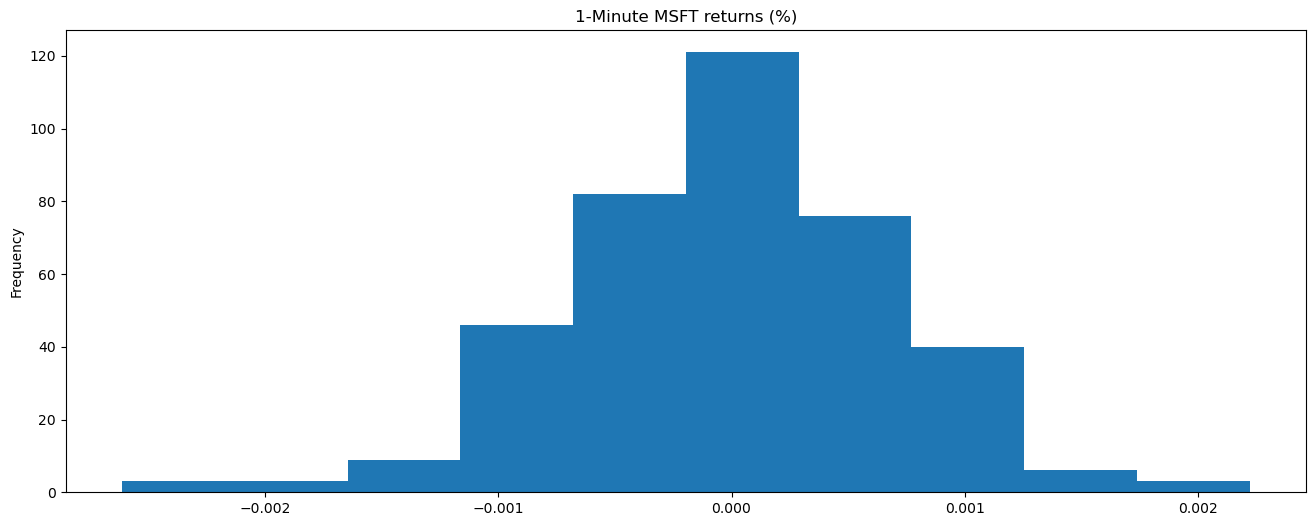

In [3]:
rets = msft.resample("60S").last().pct_change().dropna()
ax = rets.plot.hist()
ax.set_title("1-Minute MSFT returns (%)")

## Problem: Scatter Plot

Scatter the 5-minute MSFT returns against the 5-minute IBM returns.

*Hint*: You will need to create both 5-minute return series, merge them,
and then plot using the combined DataFrame. 

                         MSFT       IBM
2011-05-06 09:35:00 -0.000287 -0.002446
2011-05-06 09:40:00  0.003063  0.000473
2011-05-06 09:45:00 -0.003359 -0.000709
2011-05-06 09:50:00  0.001455 -0.000827
2011-05-06 09:55:00 -0.001453 -0.000651
                         MSFT       IBM
2011-05-06 15:35:00 -0.000386  0.000534
2011-05-06 15:40:00  0.002513  0.001837
2011-05-06 15:45:00 -0.000193 -0.000296
2011-05-06 15:50:00 -0.001535 -0.001183
2011-05-06 15:55:00 -0.000780  0.000592


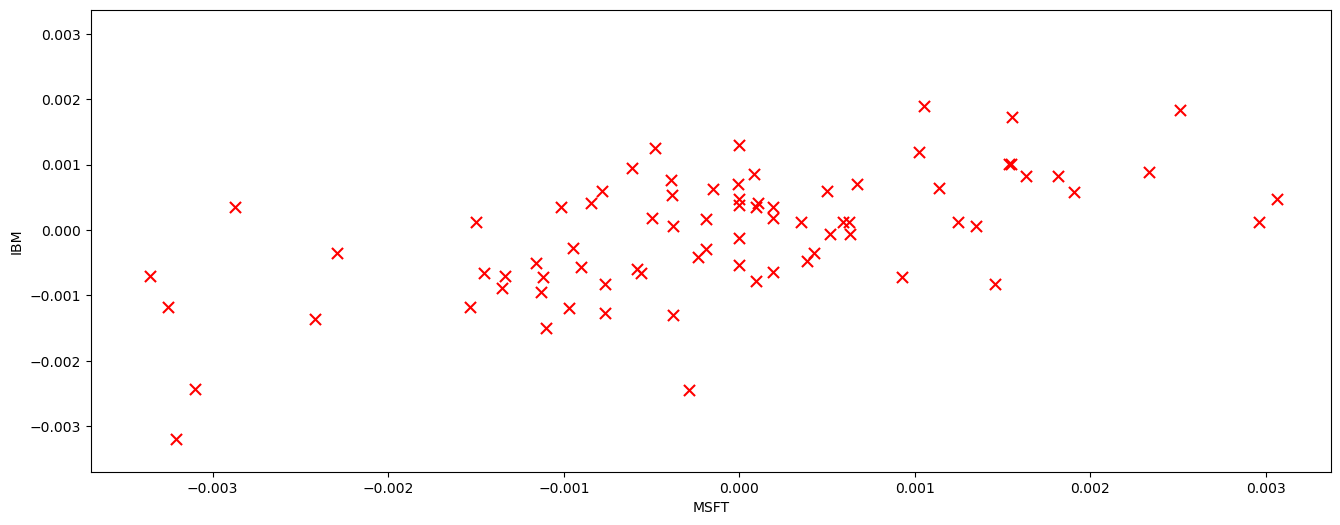

In [4]:
msft_rets = msft.resample("300S").last().pct_change().dropna()
ibm_rets = ibm.resample("300S").last().pct_change().dropna()
rets = pd.DataFrame([msft_rets, ibm_rets]).T
rets = rets.dropna()
print(rets.head())
print(rets.tail())

ax = rets.plot.scatter(x="MSFT", y="IBM", marker="x", s=64, c="red")
lower, upper = 1.1 * rets.min().min(), 1.1 * rets.max().max()
ax.set_xlim(lower, upper)
ylim = ax.set_ylim(lower, upper)

## Problem: Saving plots

Save the previous plot to PNG and PDF.

In [5]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.savefig("scatter.pdf")
# Save with custom DPI and transparent background
fig.savefig("scatter.png", transparent=True, dpi=300)

<Figure size 1600x600 with 0 Axes>

## Exercises

### Exercise: Visualize 5 and 10 minute returns

Produce a 2 by 1 subplot with a histogram of the 5-minute returns of IBM in the
top panel and 10-minute returns of IBM in the bottom. Set an appropriate title on
each of the 2 plots.

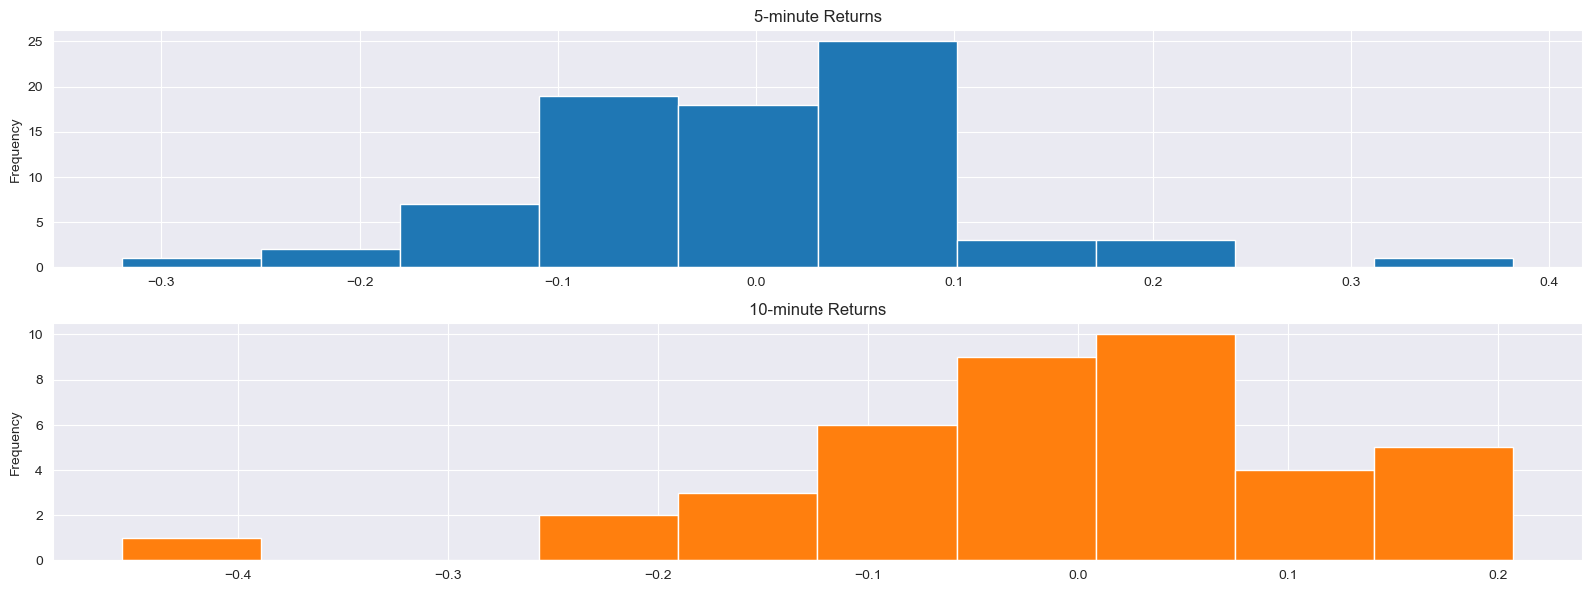

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
colors = sns.color_palette()

fig, axes = plt.subplots(2, 1)
ibm_5min = 100 * ibm.resample("300S").last().pct_change().dropna()
ibm_10min = 100 * ibm.resample("600S").last().pct_change().dropna()

ibm_5min.plot.hist(ax=axes[0], color=colors[0])
axes[0].set_title("5-minute Returns")
ibm_10min.plot.hist(ax=axes[1], color=colors[1])
axes[1].set_title("10-minute Returns")

fig.tight_layout(pad=1.0)

### Exercise: Export the result of the previous exercise to JPEG and PDF   


In [7]:
fig.savefig("exercise.jpg")
fig.savefig("exercise.pdf")

## Exercise: Plot histograms and a scatter plot

Produce a 2 by 2 subplot with:

* Create a square figure with a size of 10 by 10 using `plt.rc`
* Histograms of IBM and MSFT on the diagonals
* Scatter plots on the off-diagonals where the x and y line up with the
  histogram on the diagonal.
* Set the limits of the scatter plots to match the appropriate histogram
  x and y limit.
* Clean up the plot using `tight_layout`

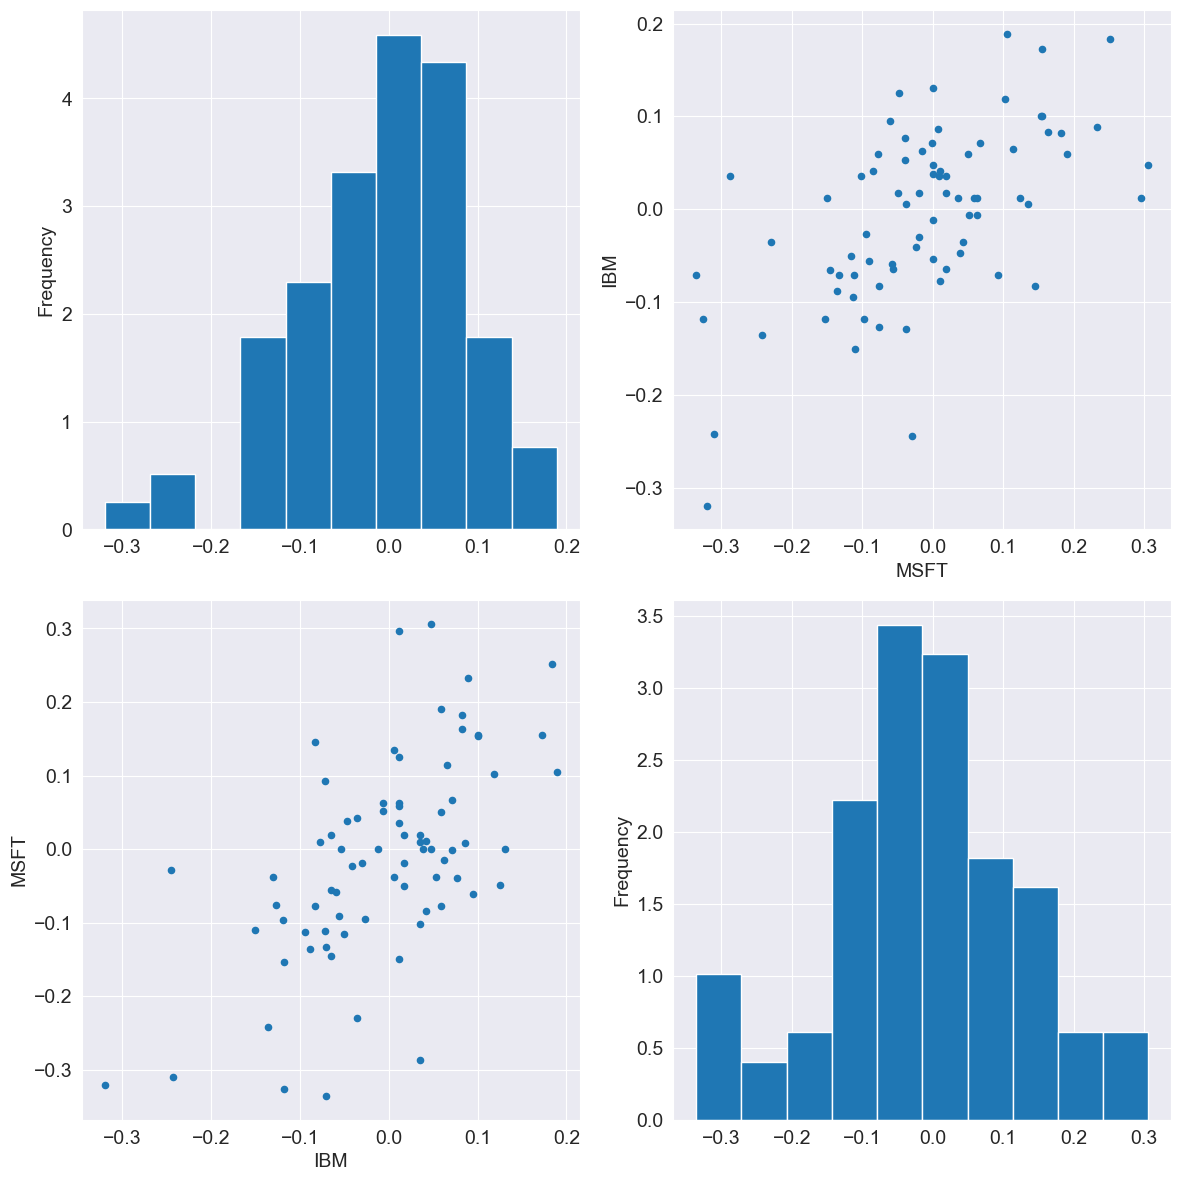

In [8]:
plt.rc("figure", figsize=(12, 12))  # Square figure works best here
plt.rc("font", size=14)  # Increase the font size

fig, axes = plt.subplots(2, 2)
# Create returns
msft_5min = 100 * msft.resample("300S").last().pct_change().dropna()
# Combine into a DataFrame
both_5min = pd.DataFrame({"MSFT": msft_5min, "IBM": ibm_5min}).dropna()
# Histograms on the diagonal
both_5min.IBM.plot.hist(ax=axes[0, 0], density=True)
both_5min.MSFT.plot.hist(ax=axes[1, 1], density=True)
# Scatter plots off diagonal
both_5min.plot.scatter(ax=axes[1, 0], x="IBM", y="MSFT")
both_5min.plot.scatter(ax=axes[0, 1], y="IBM", x="MSFT")
# Get the histogram limits
ibm_lim = axes[0, 0].get_xlim()
msft_lim = axes[1, 1].get_xlim()
# Set limits on scatter plots to match histograms
axes[1, 0].set_xlim(ibm_lim)
axes[1, 0].set_ylim(msft_lim)
axes[0, 1].set_xlim(msft_lim)
axes[0, 1].set_ylim(ibm_lim)
# Use tight_layout to fix overlapping text
fig.tight_layout(pad=1.0)

### Exercise: Use pandas plotting tools

Use `pandas.plotting.scatter_matrix` to produce a similar plot to the previous exercise.

[Text(0, 0.41133983457472834, '0.0'),
 Text(0, 0.8717447788177024, '1.0'),
 Text(0, 1.3321497230606765, '1.0'),
 Text(0, 1.7925546673036503, '2.0'),
 Text(0, 2.252959611546624, '2.0'),
 Text(0, 2.7133645557895987, '3.0'),
 Text(0, 3.1737695000325723, '3.0')]

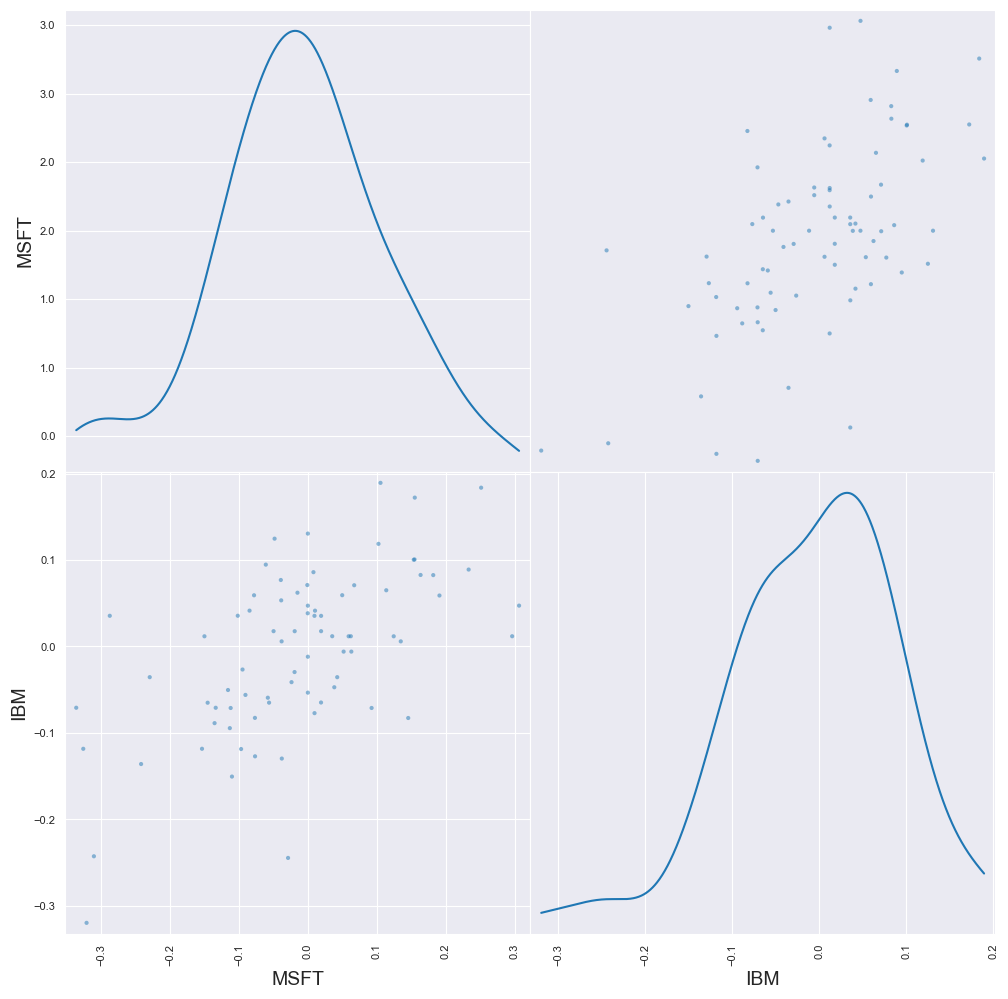

In [9]:
import numpy as np
from pandas import plotting

axes = plotting.scatter_matrix(both_5min, diagonal="kde")
# Fix hideous pandas y tick labels
new_labels = []
for label in np.round(axes[0, 0].get_yticks()):
    new_labels.append(f"{label}")
axes[0, 0].set_yticklabels(new_labels)